In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# df_01 = pd.read_excel('N = 500 seed = 10 dt = 0.1 230720 ver3.xlsm',index_col=[0,1])
df_01 = pd.read_excel('N = 500 Q_Normal seed = 10 dt = 0.1 230821 ver3.xlsm',index_col=[0,1])
# df = pd.read_excel('N = 500 seed = 10 dt = 0.1 win TLO.xlsm',index_col=[0,1])

re_df = df_01.reset_index()
Ks = re_df.K.unique()
ms = re_df.m.unique()

In [33]:
Ks

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. ])

In [34]:
df = df_01.copy()
S = df['c0'].unstack().to_numpy()
c_s = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6','c7', 'c8', 'c9']
c_o = ['c0 phase vel', 'c1 phase vel', 'c2 phase vel','c3 phase vel', 'c4 phase vel', 'c5 phase vel', 'c6 phase vel','c7 phase vel', 'c8 phase vel', 'c9 phase vel']

df_new = df.copy()
re_df = df.reset_index()
Ks = re_df.K.unique()
ms = re_df.m.unique()
for m in ms:
    for K in Ks:
        temp_o = df.loc[(K,m)][c_o].dropna().to_numpy(dtype = float)
        temp_s = df.loc[(K,m)][c_s].dropna().to_numpy(dtype = float)
        o10 = temp_o[temp_s>10]
        s10 = temp_s[temp_s>10]
        num_p = 0
        num_m = 0
        if len(o10) != 0:
            if abs(o10[0])<0.5:
                df_new.loc[(K,m),'main_s'] = s10[0]
                df_new.loc[(K,m),'main_o'] = o10[0]
                o_c10 = o10[1:]
                s_c10 = s10[1:]
            else:
                o_c10 = o10[:]
                s_c10 = s10[:]
            if len(o_c10) != 0:            
                argsort = np.argsort(s_c10)[::-1]
                for i,tempo in enumerate(o_c10[argsort]):
                    if abs(tempo)<2.5:
                        if tempo > 0:
                            df_new.loc[(K,m),f'p_s_{num_p}'] = s_c10[argsort[i]]
                            df_new.loc[(K,m),f'p_o_{num_p}'] = o_c10[argsort[i]]
                            num_p +=1
                        else:
                            df_new.loc[(K,m),f'm_s_{num_m}'] = s_c10[argsort[i]]
                            df_new.loc[(K,m),f'm_o_{num_m}'] = o_c10[argsort[i]]
                            num_m +=1

        # if abs(temp_o[argmain]) <0.5:
        #     df_new.loc[(K,m),'main_s'] = temp_s[argmain]
        #     df_new.loc[(K,m),'main_o'] = temp_o[argmain]


        # else: prinT()

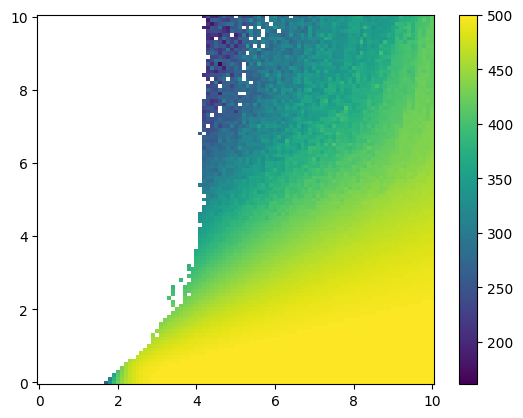

In [35]:
# plt.imshow(df_new['p_o_0'].unstack().to_numpy().T)
KK = df.index.to_frame().K.unstack().to_numpy().T
MM = df.index.to_frame().m.unstack().to_numpy().T
plt.pcolormesh(KK,MM,df_new['main_s'].unstack().to_numpy().T)
plt.colorbar()
# plt.xlim(1,3)

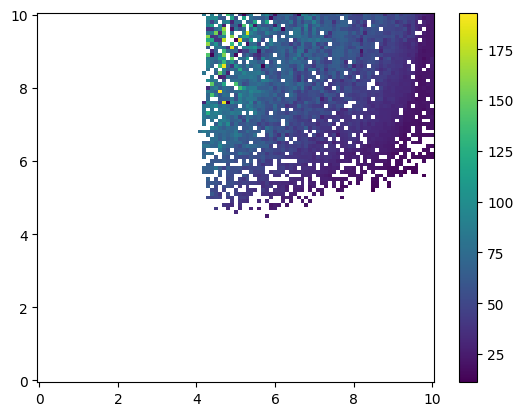

In [37]:
# plt.imshow(df_new['p_o_0'].unstack().to_numpy().T)
KK = df.index.to_frame().K.unstack().to_numpy().T
MM = df.index.to_frame().m.unstack().to_numpy().T
# plt.pcolormesh(KK,MM,df_new['main_o'].unstack().to_numpy().T)
plt.pcolormesh(KK,MM,df_new['m_s_0'].unstack().to_numpy().T)
plt.colorbar()

In [ ]:
plt.cm.cmaps_listed

{'magma': <matplotlib.colors.ListedColormap at 0x1144175d0>,
 'inferno': <matplotlib.colors.ListedColormap at 0x107b10850>,
 'plasma': <matplotlib.colors.ListedColormap at 0x114417610>,
 'viridis': <matplotlib.colors.ListedColormap at 0x114417690>,
 'cividis': <matplotlib.colors.ListedColormap at 0x1144176d0>,
 'twilight': <matplotlib.colors.ListedColormap at 0x114417710>,
 'twilight_shifted': <matplotlib.colors.ListedColormap at 0x114417750>,
 'turbo': <matplotlib.colors.ListedColormap at 0x114417790>}

In [ ]:
plt.set_theme

NameError: name 'to_draw' is not defined

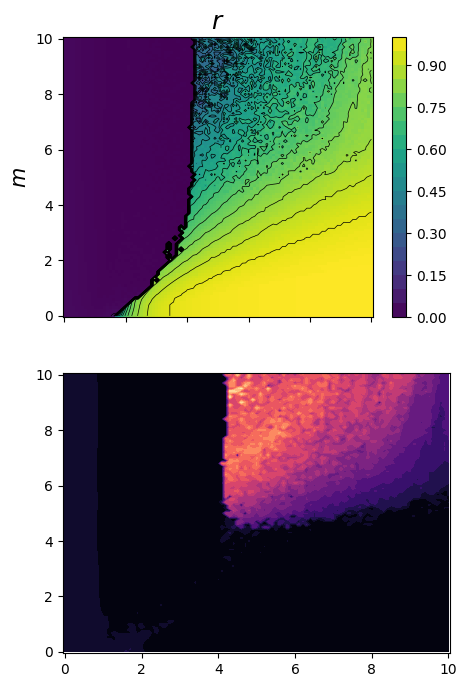

In [19]:
# plt.imshow(df_new['p_o_0'].unstack().to_numpy().T)
origin = 'lower'
fig,(axr,axrstd)= plt.subplots(2,1,sharex=True,sharey=True,dpi=100,figsize=(5,8))

plt.sca(axr)
KK = df_01.index.to_frame().K.unstack().to_numpy().T
MM = df_01.index.to_frame().m.unstack().to_numpy().T
To_show = df_new.unstack()['r'].to_numpy().T
CS = plt.contourf(KK,MM,To_show, 20, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='black',linewidths = 0.5, origin=origin)
plt.pcolormesh(KK,MM,To_show)
plt.colorbar(CS)
plt.ylabel(r'$m$',fontsize=15)
plt.title(r'$r$',fontsize=18)

plt.sca(axrstd)
KK = df_01.index.to_frame().K.unstack().to_numpy().T
MM = df_01.index.to_frame().m.unstack().to_numpy().T
CS = plt.contourf(KK,MM,df_new['rstd'].unstack().to_numpy().T,20,cmap='magma')
CS = plt.contourf(KK,MM,to_draw, lev, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.hexbin(KK,MM,df_new['rstd'].unstack().to_numpy().T,cmap='magma',alpha=1)
plt.xlabel(r'$K$',fontsize=15)
plt.ylabel(r'$m$',fontsize=15)
plt.title(r'$r(t)$ std.',fontsize=18)
plt.colorbar(CS)

# plt.xlabel(r'$K$',fontsize=15)


plt.tight_layout()


In [22]:
import matplotlib.colors as colors

In [23]:
N =500

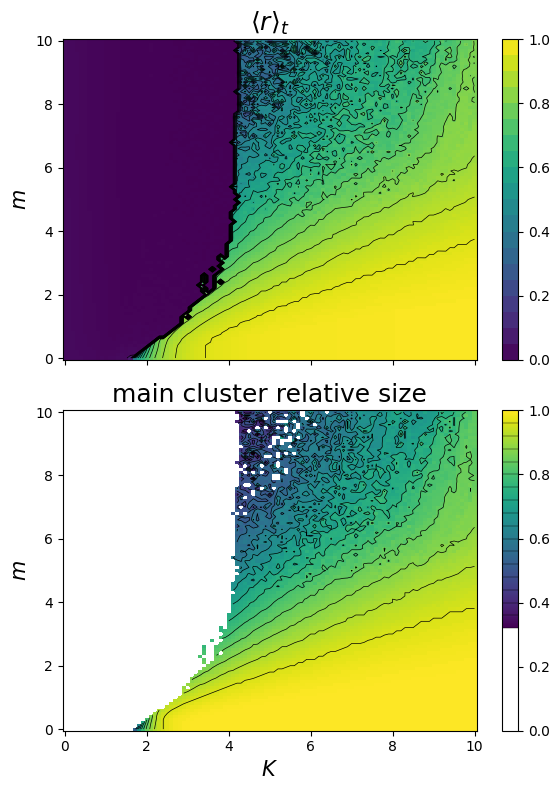

In [24]:
# plt.imshow(df_new['p_o_0'].unstack().to_numpy().T)
origin = 'lower'
fig,(axr,axmain)= plt.subplots(2,1,sharex=True,sharey=True,dpi=100,figsize=(6,8))

plt.sca(axr)
KK = df_01.index.to_frame().K.unstack().to_numpy().T
MM = df_01.index.to_frame().m.unstack().to_numpy().T
To_show = df_new.unstack()['r'].to_numpy().T
CS = plt.contourf(KK,MM,To_show, 20, origin=origin,vmax=1,vmin=0)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='black',linewidths = 0.5, origin=origin)
CS_ = plt.pcolormesh(KK,MM,To_show,vmax=1)
cbar_ = plt.colorbar(CS)
cbar_.set_ticks([0.0,0.20,0.40,0.60,0.80,1.00])
plt.ylabel(r'$m$',fontsize=15)
plt.title(r'$\langle$$r$$\rangle$$_t$',fontsize=18)

plt.sca(axmain)
KK = df_01.index.to_frame().K.unstack().to_numpy().T
MM = df_01.index.to_frame().m.unstack().to_numpy().T
Z =df_new['main_s'].unstack().to_numpy().T/N
norm = colors.Normalize(vmin=np.nanmin(Z),vmax=np.nanmax(Z))
CS = plt.contourf(KK,MM,Z,20,norm=norm,cmap='viridis')
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
CS_ = plt.pcolormesh(KK,MM,df_new['main_s'].unstack().to_numpy().T/500,cmap='viridis',alpha=1)
plt.xlabel(r'$K$',fontsize=15)
plt.ylabel(r'$m$',fontsize=15)
plt.title('main cluster relative size',fontsize=18)
cbar = plt.colorbar(CS_)
cbar.set_ticks([0,0.2,0.4,0.6,0.8,1.0])
for i in CS.levels[::]:
    cbar.ax.axhline(i,0,1,color ='k',alpha=1,lw=0.3)

# plt.xlabel(r'$K$',fontsize=15)


plt.tight_layout()
plt.savefig('2n1 relative.png',dpi=400,transparent=True)


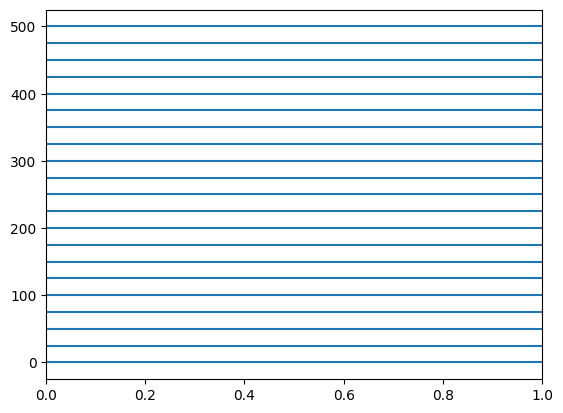

In [23]:

for i in CS.levels[::]:
    plt.axhline(i,0,1)

In [80]:
np.nanmin(df_new['main_s'].unstack().to_numpy().T)

18.0

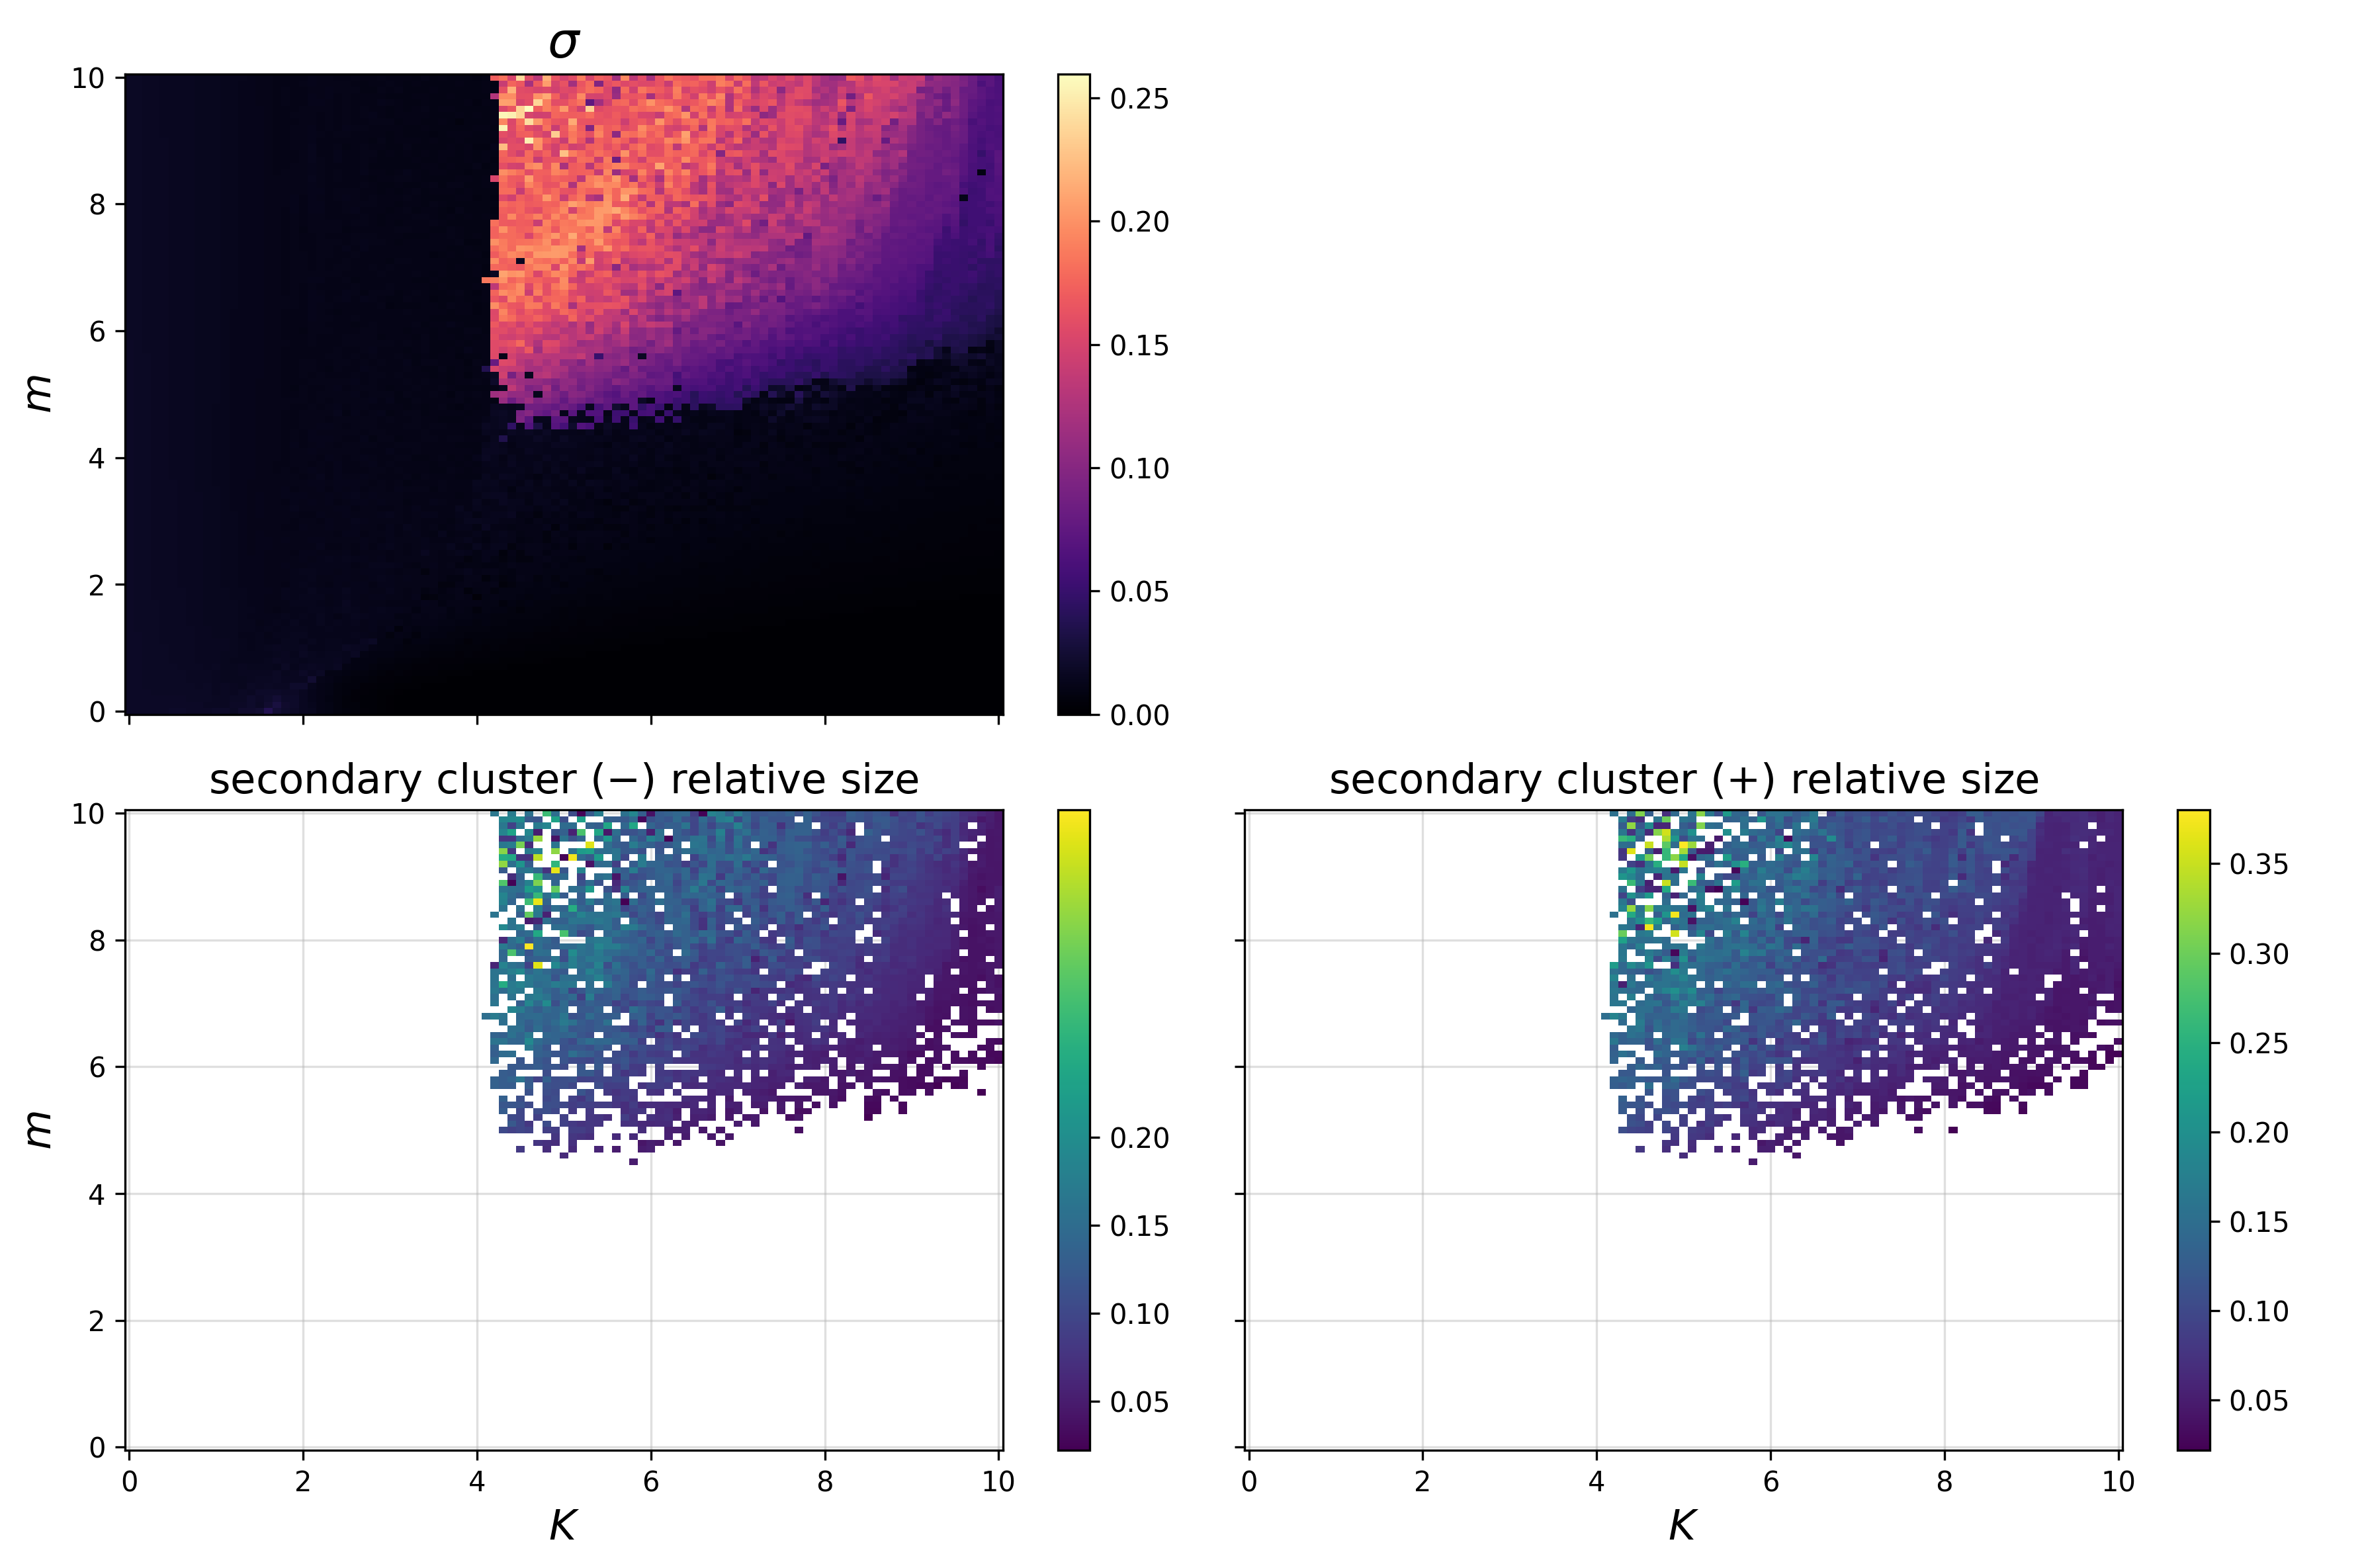

In [25]:
origin = 'lower'
fig,((axrstd,ax2nd),(ax2ndm,ax2ndp))= plt.subplots(2,2,sharex=True,sharey=True,dpi=300,figsize=(12,8))

plt.sca(axrstd)
KK = df_01.index.to_frame().K.unstack().to_numpy().T
MM = df_01.index.to_frame().m.unstack().to_numpy().T
plt.gca().set_axisbelow(True)
plt.grid(zorder=0,alpha=0.4)
# CS = plt.contourf(KK,MM,df_new['rstd'].unstack().to_numpy().T,20,cmap='magma')

# CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
CS = plt.pcolormesh(KK,MM,df_new['rstd'].unstack().to_numpy().T,cmap='magma',alpha=1)
# plt.xlabel(r'$K$',fontsize=15)
plt.ylabel(r'$m$',fontsize=15)
plt.title(r'$\sigma$',fontsize=18)
plt.colorbar(CS)

plt.sca(ax2ndp)
KK = df_01.index.to_frame().K.unstack().to_numpy().T
MM = df_01.index.to_frame().m.unstack().to_numpy().T
P_= df_new['p_s_0'].unstack().to_numpy().T/500
# CS = plt.contourf(KK,MM,P_,20,cmap='magma')
# CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
CS = plt.pcolormesh(KK,MM,P_,cmap='viridis',alpha=1)
plt.xlabel(r'$K$',fontsize=15)
plt.gca().set_axisbelow(True)

plt.grid(zorder=0,alpha=0.4)
plt.title(r'secondary cluster $(+)$ relative size',fontsize=15)
plt.colorbar(CS)


plt.sca(ax2ndm)
KK = df_01.index.to_frame().K.unstack().to_numpy().T
MM = df_01.index.to_frame().m.unstack().to_numpy().T
M_= df_new['m_s_0'].unstack().to_numpy().T/500
# CS = plt.contourf(KK,MM,M_,20,cmap='viridis')
# CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
CS = plt.pcolormesh(KK,MM,M_,cmap='viridis',alpha=1)
plt.xlabel(r'$K$',fontsize=15)
plt.ylabel(r'$m$',fontsize=15)
plt.gca().set_axisbelow(True)
plt.grid(zorder=0,alpha=0.4)
plt.title(r'secondary cluster $(-)$ relative size',fontsize=15)
plt.colorbar(CS).set_ticks([0.05,0.10,0.15,0.20])


sum_ = np.nansum(np.dstack((P_,M_)),2)
sum_ = np.where(sum_==0,np.nan,sum_)
plt.sca(ax2nd)
# KK = df_01.index.to_frame().K.unstack().to_numpy().T
# MM = df_01.index.to_frame().m.unstack().to_numpy().T
# m_= df_new['m_s_0'].unstack().to_numpy().T
# # CS = plt.contourf(KK,MM,sum_,20,cmap='viridis',alpha=0)
# # CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
# plt.gca().set_axisbelow(True)
# plt.grid(zorder=0,alpha=0.4)
# CS= plt.pcolormesh(KK,MM,sum_,cmap='viridis',alpha=1,zorder=1)
# # plt.xlabel(r'$K$',fontsize=15)
# # plt.ylabel(r'$m$',fontsize=15)
# plt.title(r'secondary cluster size $(+)+(-)$',fontsize=18)
# plt.colorbar(CS)

# ax.axis('off')
plt.gca().axis('off')
plt.tight_layout()
plt.savefig('2n2 2 relative Q_Normal.png',dpi=400,transparent=True)

In [ ]:
df

In [118]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

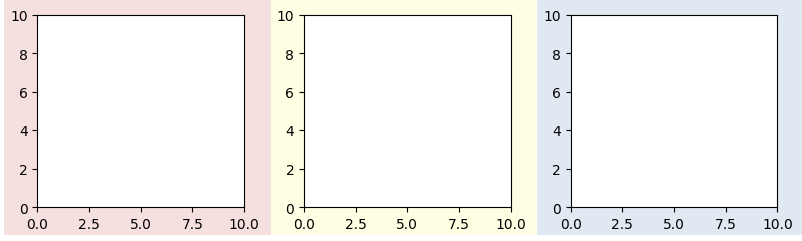

In [29]:
fig = plt.figure(figsize=(8,2.5))
subfigs = fig.subfigures(1,1)
subfigsnest = subfigs.subfigures(1,3)
axs = []
hex_c = ['#bf352a26','#fffd4726','#316ba626']

for i,(sub,c) in enumerate(zip(subfigsnest,hex_c)):
    sub.set_facecolor(c)
    ax = sub.subplots(1)
    ax.set_xlim(0,10)
    ax.set_ylim(0,10)
    axs.append(ax)
(ax2ndp,axmain,ax2ndm) = axs

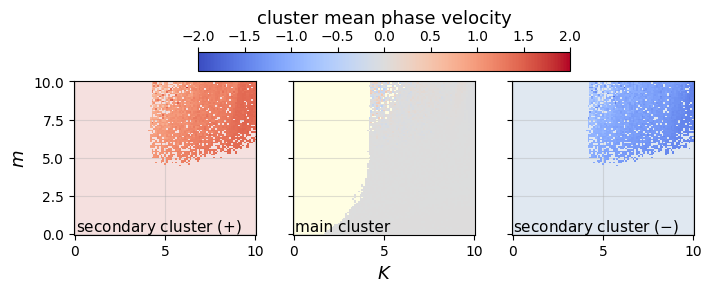

In [31]:
fig = plt.figure(figsize=(8,2.5))
subfigs = fig.subfigures(1,1)

(ax2ndp,axmain,ax2ndm) = subfigs.subplots(1,3,sharex=True,sharey=True)
hex_c = ['#bf352a26','#fffd4726','#316ba626']

for ax,color in zip((ax2ndp,axmain,ax2ndm),hex_c):
    ax.set_facecolor(color)
plt.sca(ax2ndp)
KK = df_01.index.to_frame().K.unstack().to_numpy().T
MM = df_01.index.to_frame().m.unstack().to_numpy().T
P_= df_new['p_o_0'].unstack().to_numpy().T
CS = plt.pcolormesh(KK,MM,P_,alpha=1,cmap='coolwarm',vmax=2,vmin=-2.0)
# plt.xlabel(r'$K$',fontsize=13)
plt.ylabel(r'$m$',fontsize=13)
plt.gca().set_axisbelow(True)

plt.grid(zorder=0,alpha=0.4)
plt.text(0.05,0.15,r'secondary cluster $(+)$',fontsize=11)

# plt.colorbar(CS)


plt.sca(ax2ndm)
M_= df_new['m_o_0'].unstack().to_numpy().T
CS = plt.pcolormesh(KK,MM,M_,alpha=1,cmap='coolwarm',vmax=2,vmin=-2.0)
# plt.xlabel(r'$K$',fontsize=13)
plt.gca().set_axisbelow(True)
plt.grid(zorder=0,alpha=0.4)
plt.text(0.05,0.15,r'secondary cluster $(-)$',fontsize=11)

# plt.colorbar(CS)


sum_ = np.nansum(np.dstack((P_,M_)),2)
sum_ = np.where(sum_==0,np.nan,sum_)
plt.sca(axmain)
main= df_new['main_o'].unstack().to_numpy().T

plt.gca().set_axisbelow(True)
plt.grid(zorder=0,alpha=0.4)
CS= plt.pcolormesh(KK,MM,main,alpha=1,cmap='coolwarm',vmax=2,vmin=-2.0)
plt.xlabel(r'$K$',fontsize=13)
# plt.ylabel(r'$m$',fontsize=13)
plt.text(0.05,0.15,r'main cluster',fontsize=11)
cbar =subfigs.colorbar(CS,ax=(ax2ndp,axmain,ax2ndm),location='top',shrink=0.6)
cbar.set_label(label='cluster mean phase velocity',fontsize=13)
# plt.tight_layout()
# plt.suptitle('cluster mean angular velocity',y=0.90,fontsize=15)
# plt.tight_layout()
# plt.savefig('cluster mean phase velocity.png',dpi=400)


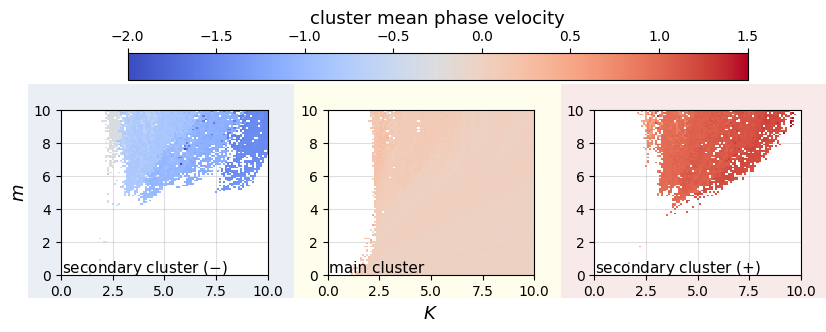

In [17]:
fig = plt.figure(figsize=(8,2.5))
colorbar,subfigs = fig.subfigures(2,1,height_ratios=[1,6])
subfigsnest = subfigs.subfigures(1,3,wspace=0.5)
axs = []

hex_c = ['#316ba61a','#fffd471a','#bf352a1a']
ax_ = colorbar.subplots(1)
for i,(sub,c) in enumerate(zip(subfigsnest,hex_c)):
    sub.set_facecolor(c)
    ax = sub.subplots(1)
    ax.set_xlim(0,10)
    ax.set_ylim(0,10)
    axs.append(ax)
    # if i == 0:
    # plt.scf(sub)
    # ax.set_ylabel(r'$m$',fontsize=13)
    # ax.set_ylabel(r'$K$',fontsize=13)

        
(ax2ndp,axmain,ax2ndm) = axs
# fig, (ax2ndp,axmain,ax2ndm)= plt.subfigures(1,3,sharex=True,sharey=True,figsize=(8,2.5))
# fig, (ax2ndp,axmain,ax2ndm)= plt.subplots(1,3,sharex=True,sharey=True,figsize=(8,2.5))


plt.sca(ax2ndm)
KK = df_01.index.to_frame().K.unstack().to_numpy().T
MM = df_01.index.to_frame().m.unstack().to_numpy().T
P_= df_new['p_o_0'].unstack().to_numpy().T
CS = plt.pcolormesh(KK,MM,P_,alpha=1,cmap='coolwarm',vmax=1.5,vmin=-2.0)
# plt.xlabel(r'$K$',fontsize=13)
plt.gca().set_axisbelow(True)

plt.grid(zorder=0,alpha=0.4)
plt.text(0.05,0.15,r'secondary cluster $(+)$',fontsize=11)

# plt.colorbar(CS)


plt.sca(ax2ndp)

M_= df_new['m_o_0'].unstack().to_numpy().T
CS = plt.pcolormesh(KK,MM,M_,alpha=1,cmap='coolwarm',vmax=1.5,vmin=-2.0)
plt.ylabel(r'$m$',fontsize=13)

# plt.xlabel(r'$K$',fontsize=13)
plt.gca().set_axisbelow(True)
plt.grid(zorder=0,alpha=0.4)
plt.text(0.05,0.15,r'secondary cluster $(-)$',fontsize=11)

# plt.colorbar(CS)


sum_ = np.nansum(np.dstack((P_,M_)),2)
sum_ = np.where(sum_==0,np.nan,sum_)
plt.sca(axmain)
main= df_new['main_o'].unstack().to_numpy().T

plt.gca().set_axisbelow(True)
plt.grid(zorder=0,alpha=0.4)
CS= plt.pcolormesh(KK,MM,main,alpha=1,cmap='coolwarm',vmax=1.5,vmin=-2.0)
plt.xlabel(r'$K$',fontsize=13)
# plt.ylabel(r'$m$',fontsize=13)
plt.text(0.05,0.15,r'main cluster',fontsize=11)
cbar =colorbar.colorbar(CS,cax=ax_,location='top',shrink=0.4)
cbar.set_label(label='cluster mean phase velocity',fontsize=13)
# plt.tight_layout()
# subfigsnest.tight_layout()
# plt.suptitle('cluster mean angular velocity',y=0.90,fontsize=15)

plt.savefig('cluster mean phase velocity2 2.png',dpi=400,transparent=True,bbox_inches="tight")


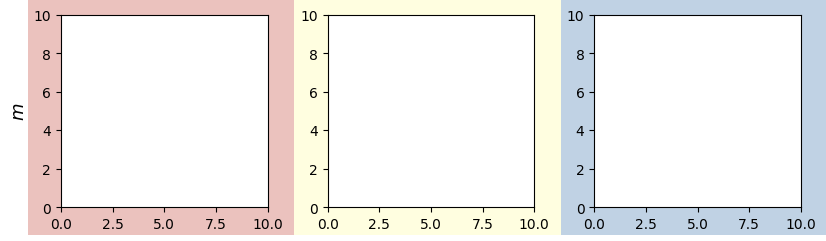

In [163]:
fig = plt.figure(figsize=(8,2.5))
subfigs = fig.subfigures(1,1)
subfigsnest = subfigs.subfigures(1,3)
axs = []
hex_c = ['#bf352a4d','#fffd472a','#316ba64d']

for i,(sub,c) in enumerate(zip(subfigsnest,hex_c)):
    ax = sub.subplots(1)

    ax.set_xlim(0,10)
    ax.set_ylim(0,10)
    # axs.append(ax)
    if i == 0:
        ax.set_ylabel(r'$m$',fontsize=13)
    sub.set_facecolor(c)

        
# (ax2ndp,axmain,ax2ndm) = axs

## Order parameter

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# df_TLO = pd.read_excel('TLO/N = 500 seed = 10 dt = 0.1 normal TLO.xlsm',index_col=[0,1])
df_TLO = pd.read_excel('N = 500 seed = 10 dt = 0.1 230720 ver3.xlsm',index_col=[0,1])

In [36]:
df = df_TLO.copy()
S = df['c0'].unstack().to_numpy()
c_s = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6','c7', 'c8', 'c9']
c_o = ['c0 phase vel', 'c1 phase vel', 'c2 phase vel','c3 phase vel', 'c4 phase vel', 'c5 phase vel', 'c6 phase vel','c7 phase vel', 'c8 phase vel', 'c9 phase vel']
temp = np.zeros_like(S)
temp2 = np.zeros_like(S)
temp3 = np.zeros_like(S)
df_new = df.copy()
re_df = df.reset_index()
Ks = re_df.K.unique()
ms = re_df.m.unique()
datas = []
for m in ms:
    for K in Ks:
        temp_o = df.loc[(K,m)][c_o].dropna().to_numpy()
        temp_s = df.loc[(K,m)][c_s].dropna().to_numpy()
        rstd = df.loc[(K,m)]['rstd']
        o10 = temp_o[temp_s>10]
        s10 = temp_s[temp_s>10]
        num_p = 0
        num_m = 0
        if len(o10) != 0:
            if abs(o10[0])<0.5:
                data = [K,m,o10[0],s10[0],'main',rstd]
                datas.append(data)
                df_new.loc[(K,m),'main_s'] = s10[0]
                df_new.loc[(K,m),'main_o'] = o10[0]
                o_c10 = o10[1:]
                s_c10 = s10[1:]
            else:
                o_c10 = o10[:]
                s_c10 = s10[:]
            if len(o_c10) != 0:            
                argsort = np.argsort(s_c10)[::-1]
                num_c_p = 0
                num_c_m = 0
                for i,tempo in enumerate(o_c10[argsort]):
                    if abs(tempo)<2.5:
                        if tempo > 0:
                            if num_c_p == 0:
                                data = [K,m,o_c10[argsort[i]],s_c10[argsort[i]],'2nd cluster(+)',rstd]
                                num_c_p+=1
                                datas.append(data)
                            df_new.loc[(K,m),f'p_s_{num_p}'] = s_c10[argsort[i]]
                            df_new.loc[(K,m),f'p_o_{num_p}'] = o_c10[argsort[i]]
                            num_p +=1
                        elif tempo < 0:
                            if num_c_m == 0:
                                data = [K,m,o_c10[argsort[i]],s_c10[argsort[i]],'2nd cluster(-)',rstd]
                                num_c_m+=1
                                datas.append(data)


                            df_new.loc[(K,m),f'm_s_{num_m}'] = s_c10[argsort[i]]
                            df_new.loc[(K,m),f'm_o_{num_m}'] = o_c10[argsort[i]]
                            num_m +=1

        # if abs(temp_o[argmain]) <0.5:
        #     df_new.loc[(K,m),'main_s'] = temp_s[argmain]
        #     df_new.loc[(K,m),'main_o'] = temp_o[argmain]


        # else: prinT()

In [62]:
df_data = pd.DataFrame(datas,columns=['K','m','cluster mean phase velocity','cluster size','type',r'$r$\'s temporal std'])

In [55]:
df_data = pd.DataFrame(datas,columns=['K','m','cluster mean phase velocity','cluster size','type',r'$r$\'s temporal std'])


In [ ]:
import plotly.express as px
import plotly
fig = px.scatter_3d(df_data,x='K',y='m',z='cluster mean phase velocity',color=r'$r$\'s temporal std',symbol = 'type',size='cluster size',size_max=15,opacity=0.7)
fig.show()
# fig.to_html()

In [143]:
plotly.offline.plot(fig, filename='Kuramoto TLO.html')

'Kuramoto TLO.html'

In [63]:
df_data.to_csv('cluster2.csv')

In [ ]:
df_data.max()

K                                  10.0
m                                  10.0
cluster mean phase velocity    1.508945
cluster size                      500.0
type                               main
$r$\'s temporal std            0.230019
dtype: object

## cluster

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/pyplot.py'>

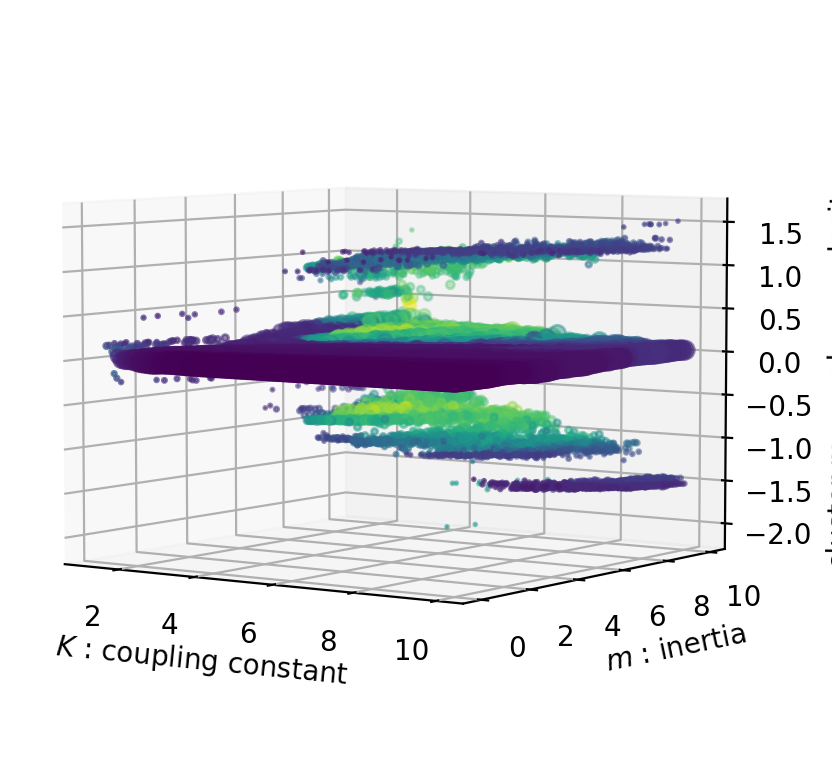

In [111]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('cluster2.csv')
K = df['K']
m = df['m']
rstd = df[r'$r$\'s temporal std']
O = df['cluster mean phase velocity']
S = df['cluster size']
fig = plt.figure()
ax = plt.subplot(111,projection='3d')
ax.scatter(K,m,O,s=S*0.1,c=rstd)
ax.set_xlabel('$K$ : coupling constant')
ax.set_ylabel('$m$ : inertia')
ax.set_zlabel('cluster mean phase velocity')

ax.view_init(elev=5., azim=-55, roll=0)
plt


         Unnamed: 0            K            m  cluster mean phase velocity  \
count   7990.000000  7990.000000  7990.000000                  7990.000000   
mean    5246.145557     6.088348     4.955257                     0.036041   
std     3893.465352     2.294034     2.940773                     0.052618   
min        0.000000     1.200000     0.000000                    -0.272691   
25%     2006.250000     4.100000     2.400000                     0.003385   
50%     4119.500000     6.100000     5.000000                     0.023490   
75%     8263.250000     8.100000     7.500000                     0.040143   
max    13694.000000    10.000000    10.000000                     0.496854   

       cluster size  $r$\'s temporal std  
count   7990.000000          7990.000000  
mean     398.468210             0.048035  
std       95.917546             0.055436  
min       18.000000             0.000000  
25%      344.000000             0.008430  
50%      429.000000             0.02207

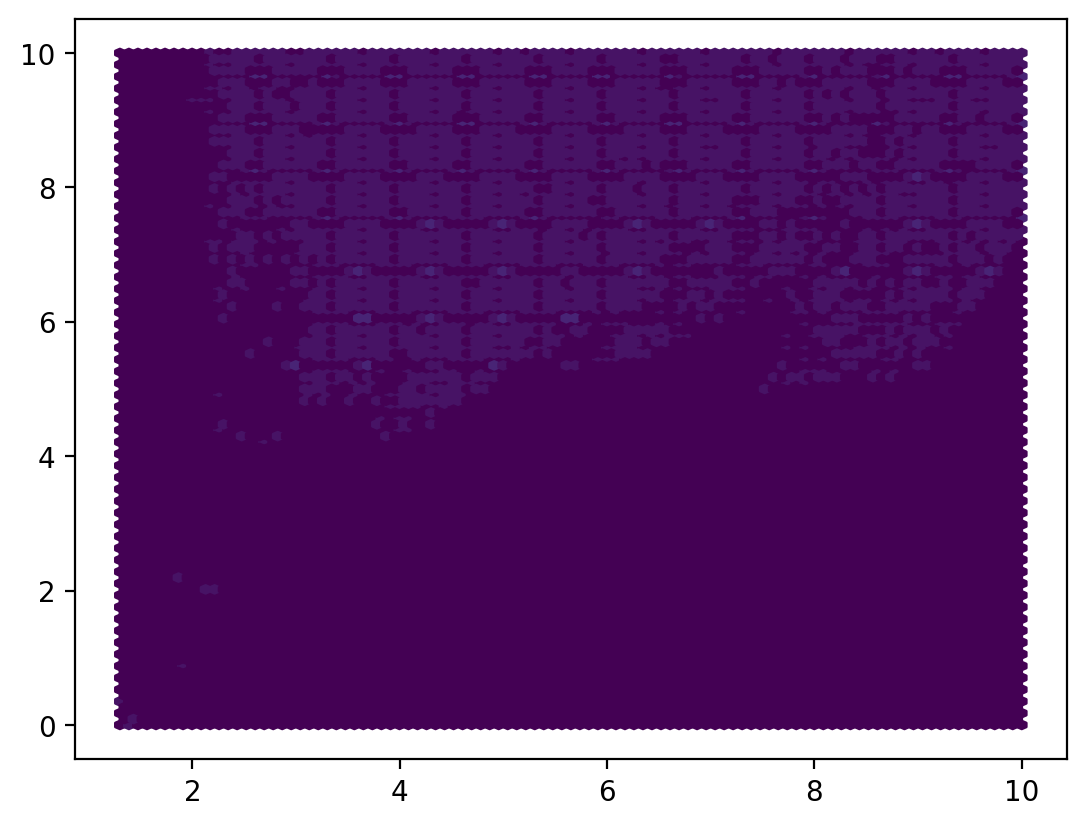

In [114]:
num = 0
for marker,type_ in zip(['s','v','^'],['main', '2nd cluster(-)', '2nd cluster(+)']):
    temp = df.query(f'type == \'{type_}\'')
    print(temp.describe())
    if num ==1:
        plt.hexbin(temp['K'],temp['m'],vmin=0,vmax=20)
    num +=1

In [115]:
df = pd.read_csv('cluster2.csv')

In [45]:
ls

230720 visualization.py
230721 poster figure.ipynb
2n1.png
2n2.png
Kuramoto TLO.html
N = 500 seed = 10 dt = 0.1 230720 ver3.xlsm
TLO/
cluster.csv
main.png
minus.png
plus.png
plus_size.png
temp.png
total.png


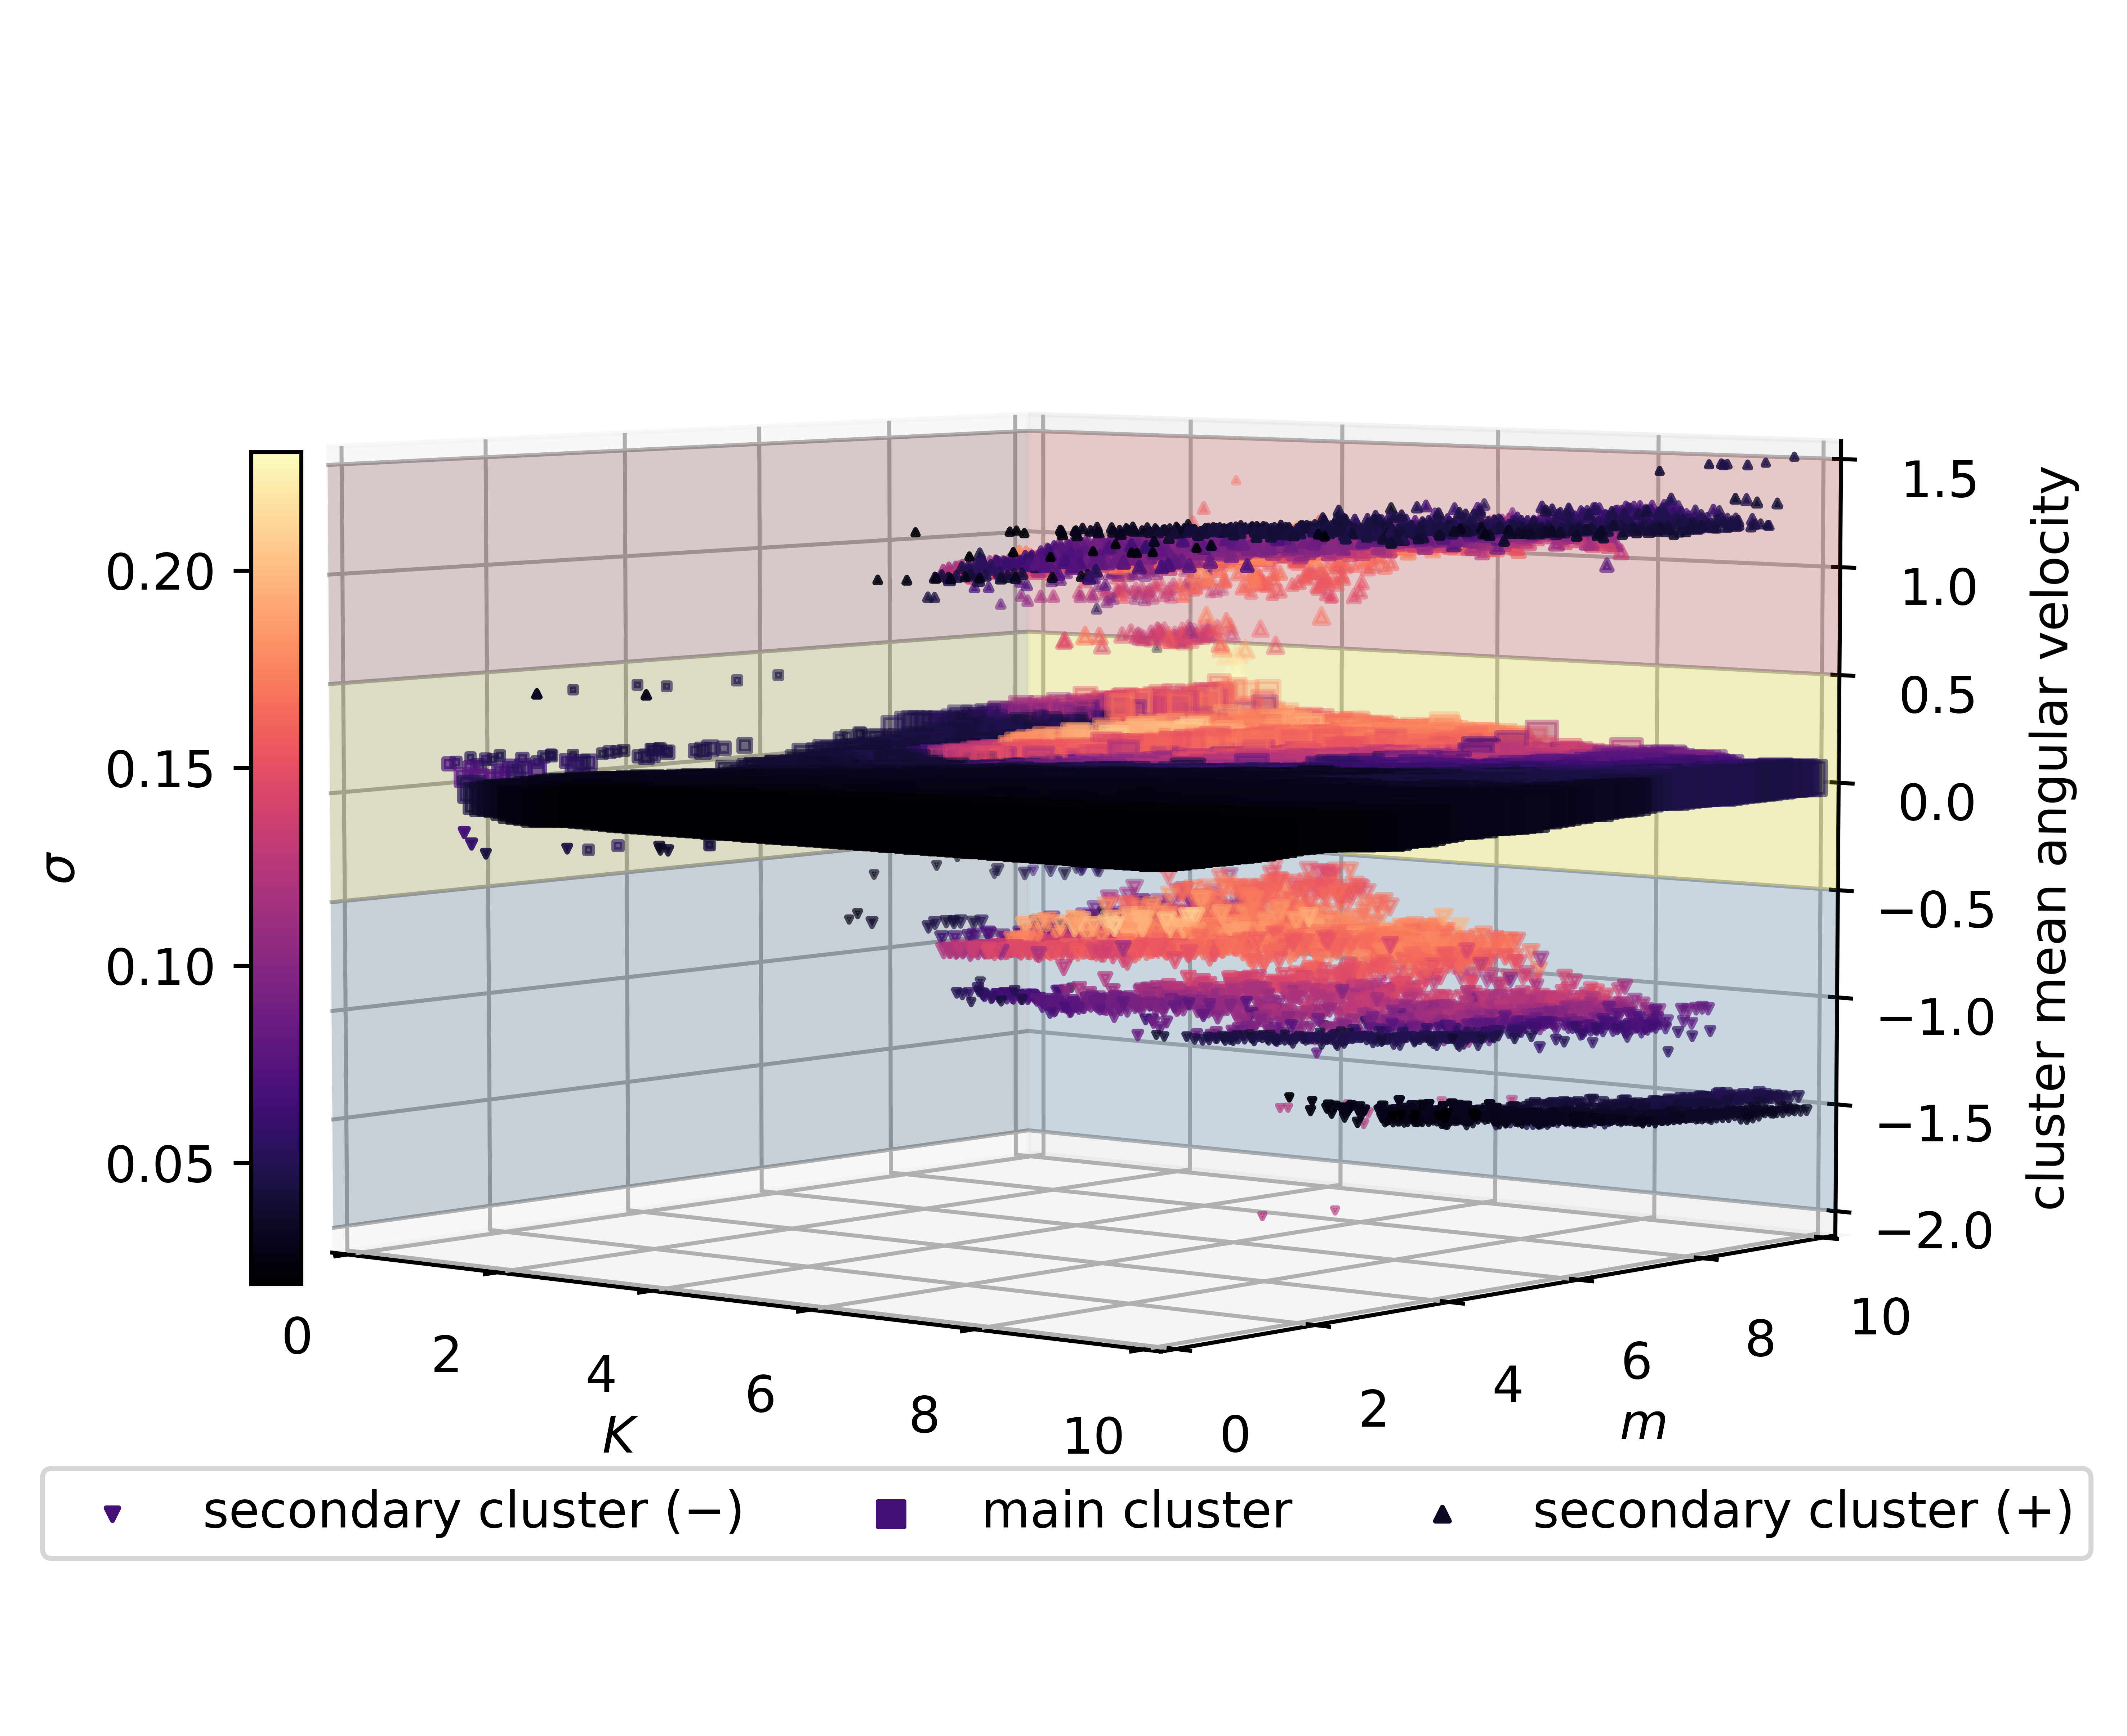

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

K = df['K']
m = df['m']
rstd = df[r'$r$\'s temporal std']
O = df['cluster mean phase velocity']
S = df['cluster size']
marker = df['type'].map({'main':'s','2nd cluster(-)':'v','2nd cluster(+)':'^'})

fig = plt.figure(figsize=(7,6),dpi=500)
ax = plt.subplot(projection='3d')
for marker,type_,label in zip(['v','s','^'],['2nd cluster(-)','main', '2nd cluster(+)'],[r'secondary cluster $(-)$','main cluster' , r'secondary cluster $(+)$']):
    df_temp = df.query(f'type == \'{type_}\'')
    K = df_temp['K']
    m = df_temp['m']
    rstd = df_temp[r'$r$\'s temporal std']
    O = df_temp['cluster mean phase velocity']
    S = df_temp['cluster size']
    sca = ax.scatter(K,m,O,s=S*0.1,c=rstd,cmap='magma',marker=marker,label =label)
# cax = ax.inset_axes([0.05, 0.8, 0.9, 0.03])
cax = ax.inset_axes([0.01, 0.25, 0.03, 0.5])
bar = fig.colorbar(sca, ax=ax, cax=cax,location='left')
# bar = plt.colorbar(sca,shrink=0.5,location='top')
bar.set_label(r'$\sigma$')
bar.set_ticks([0.05,0.1,0.15,0.20])

ca = ax.inset_axes([1.1, 0.25, 0.01, 0])
ca.axis('off')

# bar = plt.colorbar(sca,shrink=0.5,location='left')
# bar.set_label(r'$\sigma$')
# bar.set_ticks([0.05,0.1,0.15,0.2])
# ax.set_xlabel('$K$ : coupling constant')
# ax.set_ylabel('$m$ : inertia')

ax.set_xlabel(r'$K$')
ax.set_ylabel(r'$m$')
ax.yaxis._axinfo['label']['space_factor'] = 3.0
ax.set_zlabel('cluster mean angular velocity',)
# ax.text(11.5, 11.5, -1.65, 'cluster mean angular velocity', zdir='z',rotation=0)

# ax.set_zlabel()
# bar.set_label(r'$r$ temporal std.')
ax.view_init(elev=5., azim=-50, roll=0)
# ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.3))
ax.set_xlim([0,10])
ax.set_ylim([0,10])
# ax.set_zlim([-1.8,1.8])
ax.set_xmargin(0)
ax.set_ymargin(0)
ax.set_zmargin(0)

yy, zz = np.meshgrid([-0.2,10.2], [0.5,1.5])
xx = yy*0-0.2
ax.plot_surface(xx, yy, zz,alpha=0.2,color ='tab:red')

xx, zz = np.meshgrid([-0.2,10.2], [0.5,1.5])
yy = yy*0+10.2
ax.plot_surface(xx, yy, zz,alpha=0.2,color ='tab:red')



yy, zz = np.meshgrid([-0.2,10.2], [-0.5,0.5])
xx = yy*0-0.2
ax.plot_surface(xx, yy, zz,alpha=0.2,color ='yellow')

xx, zz = np.meshgrid([-0.2,10.2], [-0.5,0.5])
yy = yy*0+10.2
ax.plot_surface(xx, yy, zz,alpha=0.2,color ='yellow')
# ax.zaxis.labelpad=-0.5


yy, zz = np.meshgrid([-0.2,10.2], [-2.0,-0.5])
xx = yy*0-0.2
ax.plot_surface(xx, yy, zz,alpha=0.2,color ='tab:blue')

xx, zz = np.meshgrid([-0.2,10.2], [-2.0,-0.5])
yy = yy*0+10.2
ax.plot_surface(xx, yy, zz,alpha=0.2,color ='tab:blue')

ax.legend(loc=8,ncols=3,bbox_to_anchor=(0.5, 0.07))
# fig.tight_layout()
# plt.savefig('total2.png',transparent=True,dpi=300,bbox_inches='tight')
# plt.show()


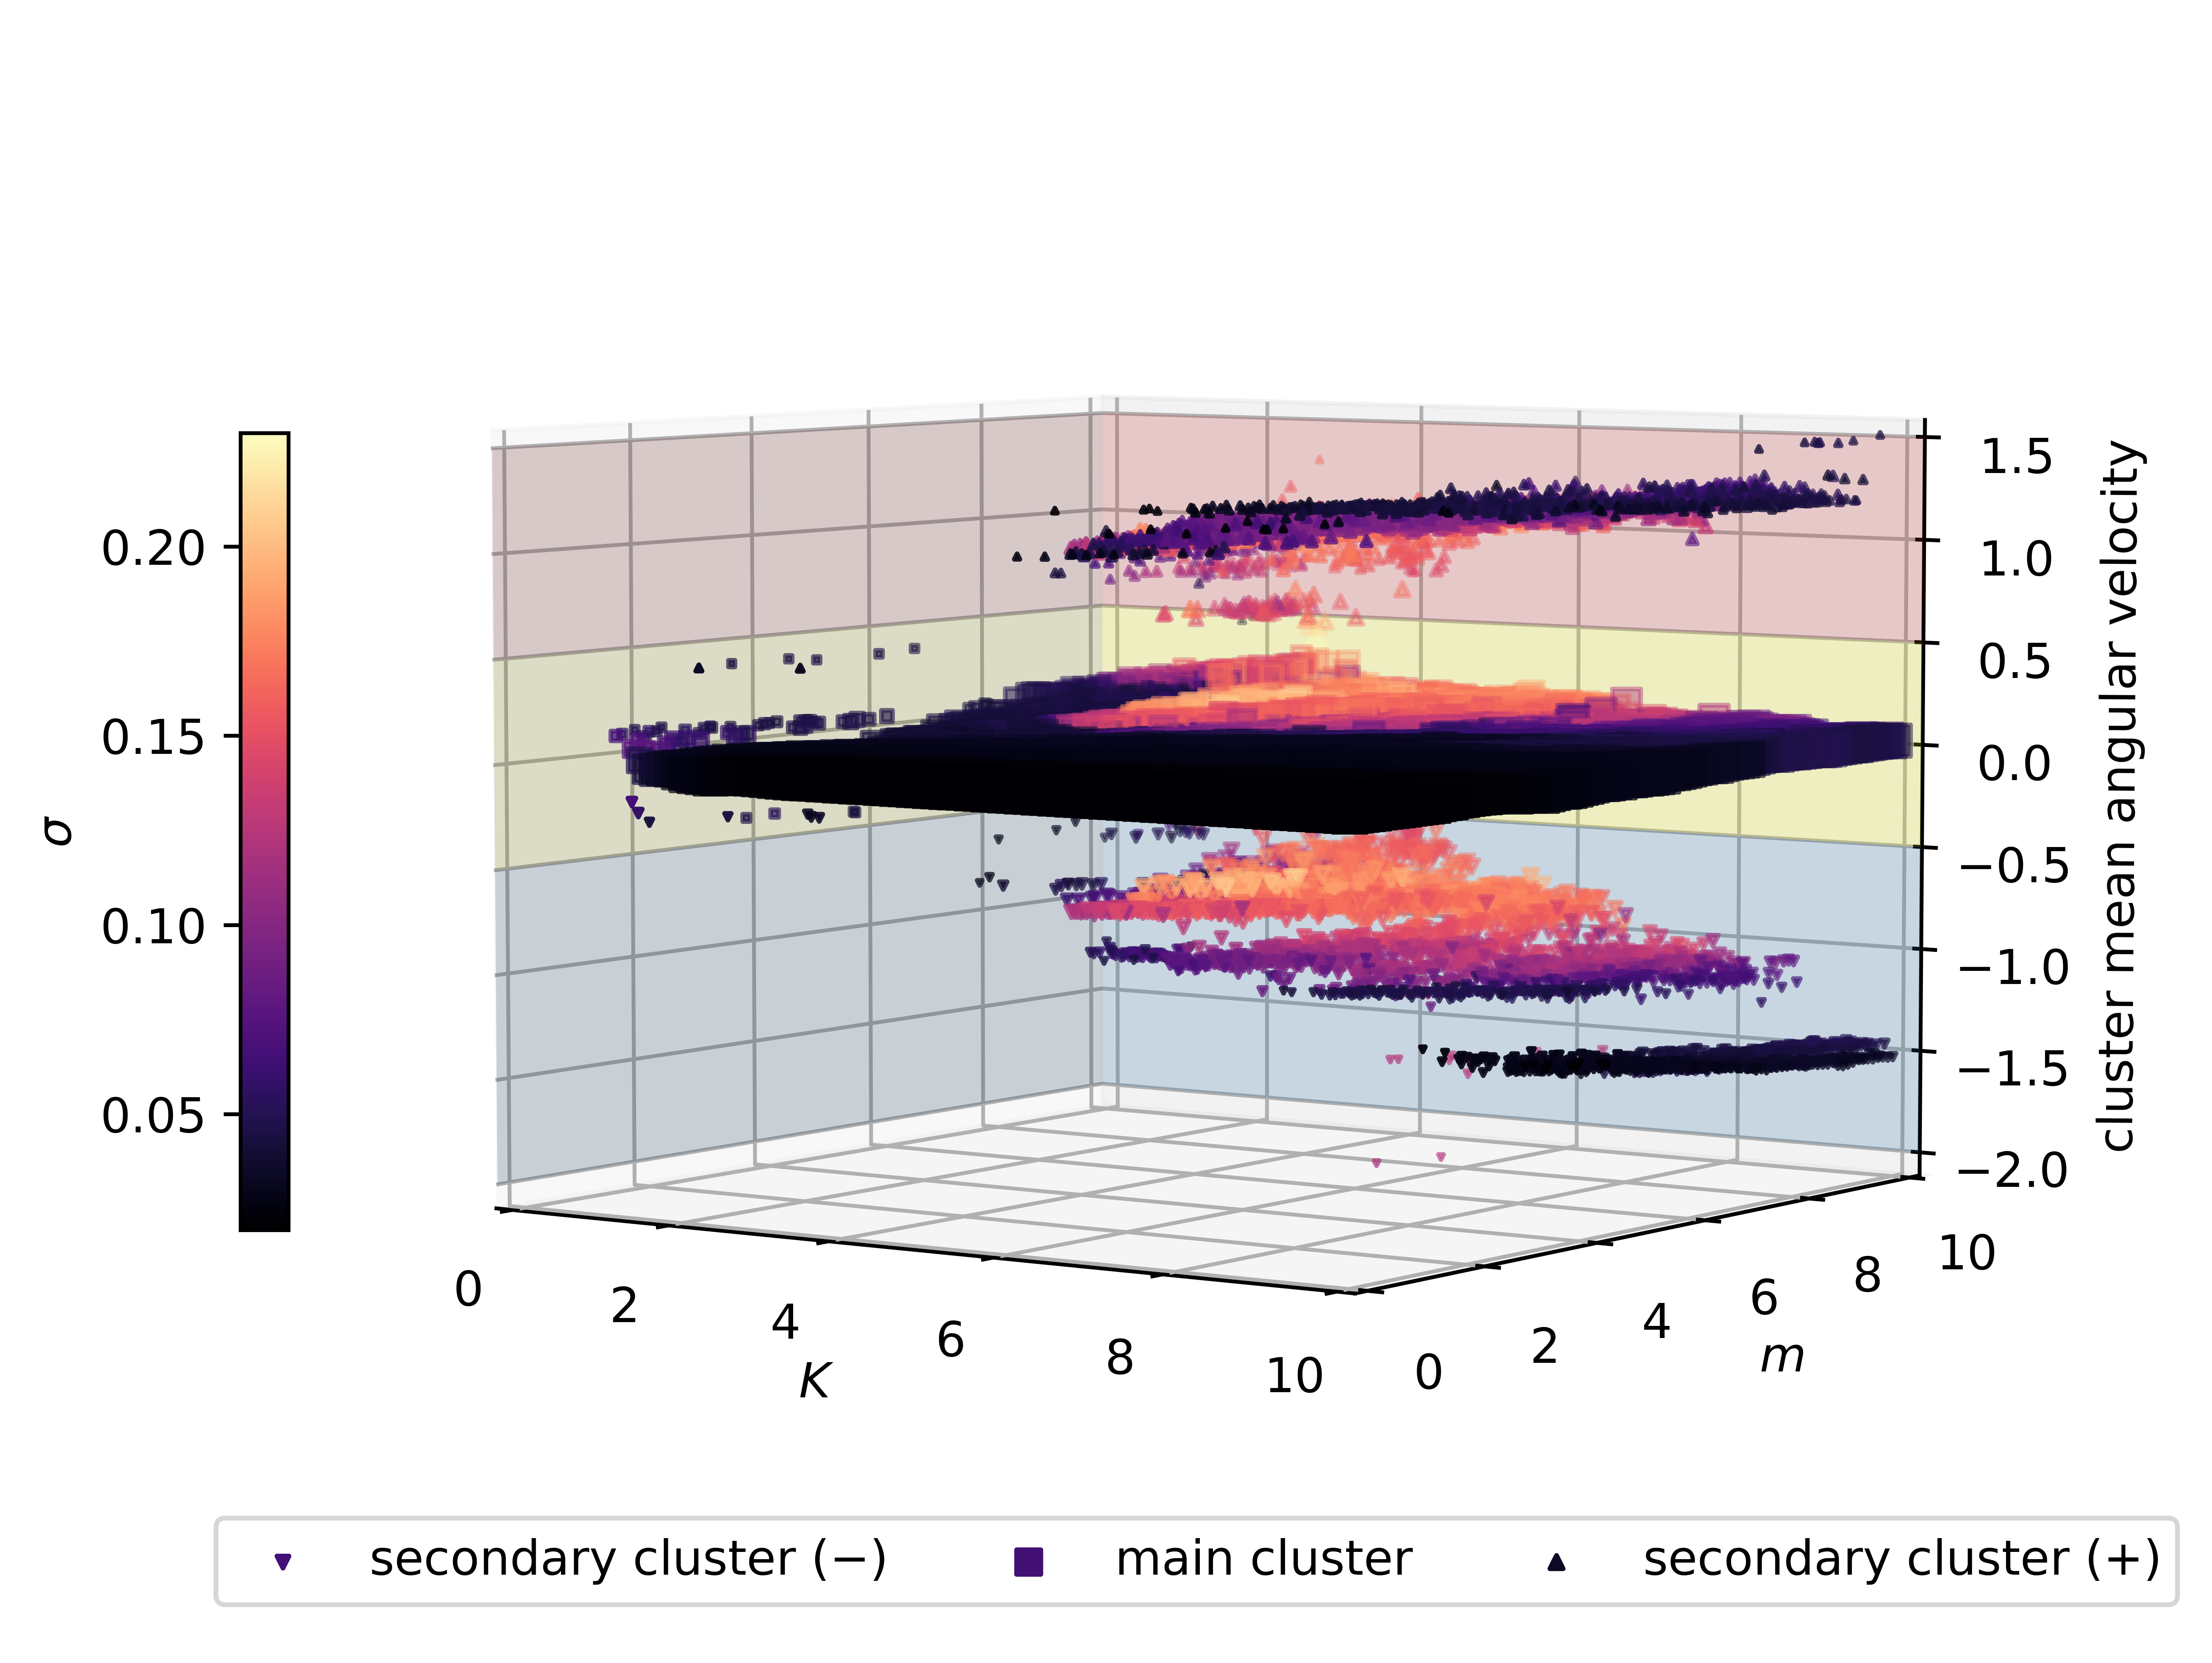

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

K = df['K']
m = df['m']
rstd = df[r'$r$\'s temporal std']
O = df['cluster mean phase velocity']
S = df['cluster size']
marker = df['type'].map({'main':'s','2nd cluster(-)':'v','2nd cluster(+)':'^'})

fig = plt.figure(figsize=(7,6),dpi=500)
ax = plt.subplot(projection='3d')
for marker,type_,label in zip(['v','s','^'],['2nd cluster(-)','main', '2nd cluster(+)'],[r'secondary cluster $(-)$','main cluster' , r'secondary cluster $(+)$']):
    df_temp = df.query(f'type == \'{type_}\'')
    K = df_temp['K']
    m = df_temp['m']
    rstd = df_temp[r'$r$\'s temporal std']
    O = df_temp['cluster mean phase velocity']
    S = df_temp['cluster size']
    sca = ax.scatter(K,m,O,s=S*0.1,c=rstd,cmap='magma',marker=marker,label =label)
# cax = ax.inset_axes([0.05, 0.8, 0.9, 0.03])
cax = ax.inset_axes([-0.1, 0.25, 0.03, 0.5])
bar = fig.colorbar(sca, ax=ax, cax=cax,location='left')
# bar = plt.colorbar(sca,shrink=0.5,location='top')
bar.set_label(r'$\sigma$')
bar.set_ticks([0.05,0.1,0.15,0.20])

ca = ax.inset_axes([0.1, 0.25, 0.01, 0])
ca.axis('off')

# bar = plt.colorbar(sca,shrink=0.5,location='left')
# bar.set_label(r'r(t) std.')
# bar.set_ticks([0.05,0.1,0.15,0.2])
# ax.set_xlabel('$K$ : coupling constant')
# ax.set_ylabel('$m$ : inertia')

ax.set_xlabel(r'$K$')
ax.set_ylabel(r'$m$')
ax.yaxis._axinfo['label']['space_factor'] = 3.0
ax.set_zlabel('cluster mean angular velocity',)
# ax.text(11.5, 11.5, -1.65, 'cluster mean angular velocity', zdir='z',rotation=0)

# ax.set_zlabel()
# bar.set_label(r'$r$ temporal std.')
# ax.view_init(elev=5., azim=-50, roll=0)
ax.view_init(elev=5., azim=-55,roll=0)
# ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.3))
ax.set_xlim([0,10])
ax.set_ylim([0,10])
# ax.set_zlim([-1.8,1.8])
ax.set_xmargin(0)
ax.set_ymargin(0)
ax.set_zmargin(0)

yy, zz = np.meshgrid([-0.2,10.2], [0.5,1.5])
xx = yy*0-0.2
Cpx_min =ax.plot_surface(xx, yy, zz,alpha=0.2,color ='tab:red',zorder=-1)
Cpx_max =ax.plot_surface(xx+10.4, yy, zz,alpha=0.2,color ='tab:red',zorder=-1)

xx, zz = np.meshgrid([-0.2,10.2], [0.5,1.5])
yy = yy*0+10.2
Cpy_min =ax.plot_surface(xx, yy-10.4, zz,alpha=0.2,color ='tab:red',zorder=-1)
Cpy_max =ax.plot_surface(xx, yy, zz,alpha=0.2,color ='tab:red',zorder=-1)



yy, zz = np.meshgrid([-0.2,10.2], [-0.5,0.5])
xx = yy*0-0.2
Cmainx_min =ax.plot_surface(xx, yy, zz,alpha=0.2,color ='yellow',zorder=-1)
Cmainx_max =ax.plot_surface(xx+10.4, yy, zz,alpha=0.2,color ='yellow',zorder=-1)

xx, zz = np.meshgrid([-0.2,10.2], [-0.5,0.5])
yy = yy*0+10.2
Cmainy_min=ax.plot_surface(xx, yy-10.4, zz,alpha=0.2,color ='yellow',zorder=-1)
Cmainy_max=ax.plot_surface(xx, yy, zz,alpha=0.2,color ='yellow',zorder=-1)
# ax.zaxis.labelpad=-0.5


yy, zz = np.meshgrid([-0.2,10.2], [-2.0,-0.5])
xx = yy*0-0.2
Cmx_min =ax.plot_surface(xx, yy, zz,alpha=0.2,color ='tab:blue',zorder=-1)
Cmx_max =ax.plot_surface(xx+10.4, yy, zz,alpha=0.2,color ='tab:blue',zorder=-1)

xx, zz = np.meshgrid([-0.2,10.2], [-2.0,-0.5])
yy = yy*0+10.2
Cmy_min=ax.plot_surface(xx, yy-10.4, zz,alpha=0.2,color ='tab:blue',zorder=-1)
Cmy_max=ax.plot_surface(xx, yy, zz,alpha=0.2,color ='tab:blue',zorder=-1)

def set_alphas(xmin,xmax,ymin,ymax):
    Cmy_max.set_alpha(ymax)
    Cpy_max.set_alpha(ymax)
    Cmainy_max.set_alpha(ymax)
    
    Cmy_min.set_alpha(ymin)
    Cpy_min.set_alpha(ymin)
    Cmainy_min.set_alpha(ymin)
    
    Cmx_max.set_alpha(xmax)
    Cpx_max.set_alpha(xmax)
    Cmainx_max.set_alpha(xmax)

    Cmx_min.set_alpha(xmin)
    Cpx_min.set_alpha(xmin)
    Cmainx_min.set_alpha(xmin)
ax.legend(loc=8,ncols=3,bbox_to_anchor=(0.5, 0.00))
deg = ax.azim%360
if (deg>=0)&(deg<=90):
    kminkmax_mminmmax = (0.2,0,0.2,0)
    set_alphas(*kminkmax_mminmmax)
elif (deg>90)&(deg<=180):
    kminkmax_mminmmax = (0.,0.2,0.1,0)
    set_alphas(*kminkmax_mminmmax)
elif (deg>180)&(deg<270):
    kminkmax_mminmmax = (0.,0.2,0.,0.1)
    set_alphas(*kminkmax_mminmmax)
else:
    kminkmax_mminmmax = (0.2,0.,0.,0.2)
    set_alphas(*kminkmax_mminmmax)


# fig.tight_layout()
# plt.savefig('total2.png',transparent=True,dpi=300,bbox_inches='tight')
# plt.show()


In [60]:
ax.view_init(elev=5., azim=-10-360, roll=0)
ax.azim%360


350

In [37]:
ax.azim

0

In [30]:
Cmainx.set_alpha(0)

In [7]:
from matplotlib.animation import FuncAnimation 
from IPython.display import HTML

In [132]:
roll_array_  = np.linspace(-20,20,180) 
roll_array = np.r_[roll_array_,roll_array_[::-1]]
roll_array
def animate(i):
    ax.view_init(elev=5, azim=-50+i, roll=0)
    deg = ax.azim%360
    if (deg>=0)&(deg<=90):
        kminkmax_mminmmax = (0.2,0,0.2,0)
        set_alphas(*kminkmax_mminmmax)
    elif (deg>90)&(deg<=180):
        kminkmax_mminmmax = (0.,0.2,0.1,0)
        set_alphas(*kminkmax_mminmmax)
    elif (deg>180)&(deg<270):
        kminkmax_mminmmax = (0.,0.2,0.,0.1)
        set_alphas(*kminkmax_mminmmax)
    else:
        kminkmax_mminmmax = (0.2,0.,0.,0.2)
        set_alphas(*kminkmax_mminmmax)


In [135]:
%config InlineBackend.figure_format = 'retina'
idx = np.arange(0,360,1)
ani = FuncAnimation(fig,animate,frames=idx,interval=50)
ani.save('K-m space cluster mean angular velocity.mp4',dpi=400)
# HTML(ani.to_html5_video())

In [35]:
df_new['p_s_0'].describe()


NameError: name 'df_new' is not defined

In [ ]:
-1.107522,-0.144122

In [ ]:
import seaborn as sns

(array([[16.,  9.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [20., 13.,  9.,  7.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  1.,  0.],
        [25., 25., 25., 22., 17., 15., 14., 15., 14., 14., 16., 16., 15.,
         17., 20., 17., 18., 20., 21., 28.],
        [20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.,
         20., 20., 20., 19., 19., 19., 23.],
        [20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.,
         19., 20., 20., 18., 20., 20., 21.],
        [25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25.,
         25., 25., 25., 25., 25., 25., 30.],
        [20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.,
         20., 20., 20., 20., 20., 20., 24.],
        [25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25.,
         25., 25., 25., 25., 23., 24., 30.],
        [20., 20., 20., 20., 20., 20., 20., 20.,

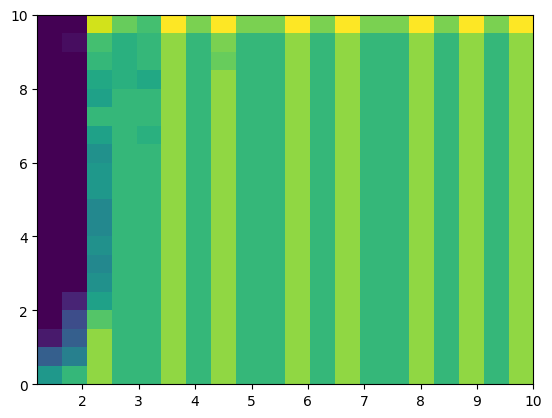

In [ ]:
plt.hist2d(df_data.query('type == \'main\'')['K'],df_data.query('type == \'main\'')['m'],bins=20)

In [ ]:
sns.histogram2d(df_data.query('type == \'main\''),x='K',y='m',)

AttributeError: module 'seaborn' has no attribute 'histogram2d'

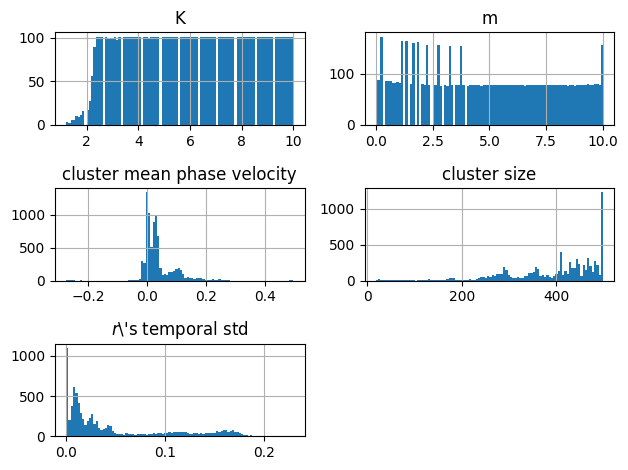

In [ ]:
df_data.query('type == \'main\'').hist(bins=100)
plt.tight_layout()


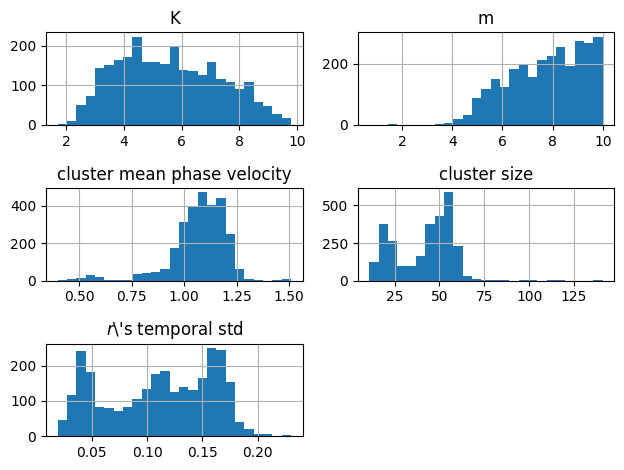

In [ ]:
df_data.query('type == \'2nd cluster(+)\'').hist(bins=25)
plt.tight_layout()

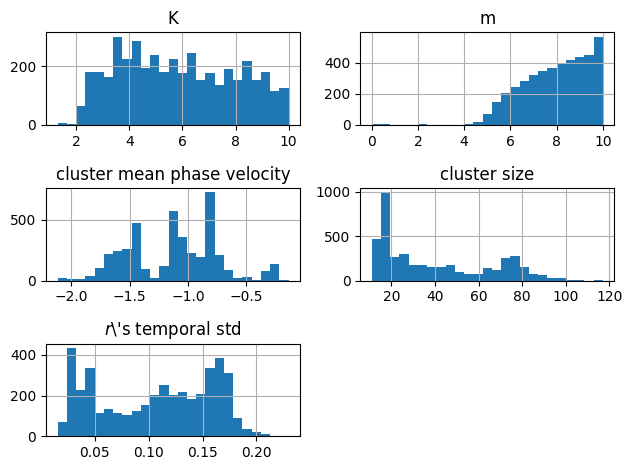

In [ ]:
df_data.query('type == \'2nd cluster(-)\'').hist(bins=25)
plt.tight_layout()

In [ ]:
df_data['type'].value_counts()

main              7990
2nd cluster(-)    3834
2nd cluster(+)    2619
Name: type, dtype: int64

In [ ]:
def beta(gamma):
    if gamma>4: return 1
    elif (gamma>3)&(gamma<4):return 1/(gamma-3)
    elif (gamma>2)&(gamma<3):return 1+(gamma-2)/(1-(gamma-2)**2)
    else: return np.nan

In [ ]:
gammas = np.linspace(2,6,200)
betas = list(map(beta,gammas))

[]

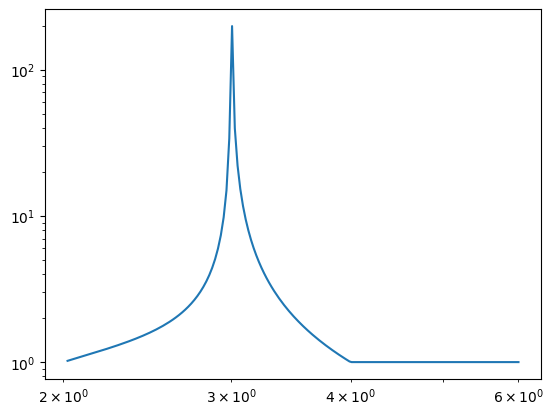

In [ ]:
plt.plot(gammas,betas)
plt.loglog()

/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_1292/1112163154.py:15: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



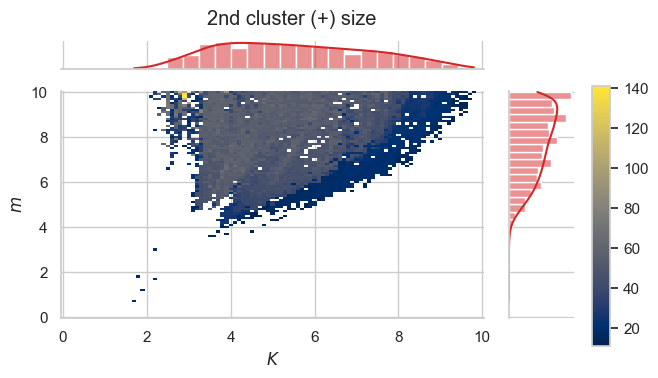

In [ ]:

g = sns.jointplot(df_data.query('type == \'2nd cluster(+)\''), x="K", y="m",kind='reg',color='tab:red')
g.ax_joint.cla()
fig = plt.gcf()
fig.set_figwidth(6)
fig.set_figheight(4)
plt.sca(g.ax_joint)
CS=plt.pcolormesh(KK,MM,df_new['p_s_0'].unstack().to_numpy().T,zorder=2,cmap='')
# cbar_ax = g.fig.add_axes([0.1,0.2,0.8,0.1])
plt.xlabel(r'$K$')
plt.ylabel(r'$m$')
cbar_ax = g.fig.add_axes([1, 0.1, .03, .65])
cb = plt.colorbar(cax=cbar_ax)
# plt.title('cluster size')
plt.suptitle('2nd cluster (+) size',y=0.94)
plt.tight_layout()
plt.savefig('23 statphys poster/plus_size.png',dpi=300,transparent=True)
# plt.title('adsf')
# plt.colorbar(CS)

/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_1292/2144893644.py:15: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



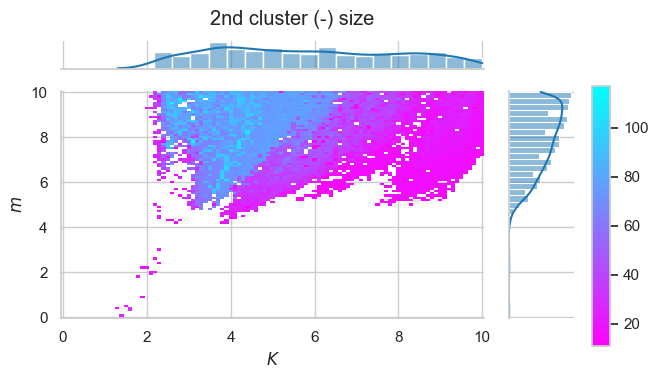

In [ ]:

g = sns.jointplot(df_data.query('type == \'2nd cluster(-)\''), x="K", y="m",kind='reg',color='tab:blue')
g.ax_joint.cla()
fig = plt.gcf()
fig.set_figwidth(6)
fig.set_figheight(4)
plt.sca(g.ax_joint)
CS=plt.pcolormesh(KK,MM,df_new['m_s_0'].unstack().to_numpy().T,zorder=2,cmap='cool_r')
# cbar_ax = g.fig.add_axes([0.1,0.2,0.8,0.1])
plt.xlabel(r'$K$')
plt.ylabel(r'$m$')
cbar_ax = g.fig.add_axes([1, 0.1, .03, .65])
cb = plt.colorbar(cax=cbar_ax)
# plt.title('cluster size')
plt.suptitle('2nd cluster (-) size',y=0.94)
plt.tight_layout()
# plt.savefig('23 statphys poster/minus_size.png',dpi=300,transparent=True)
# plt.title('adsf')
# plt.colorbar(CS)

/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_1292/2691925090.py:15: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



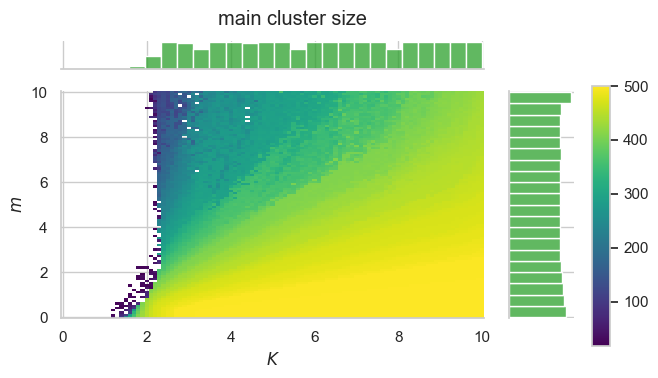

In [ ]:

g = sns.jointplot(df_data.query('type == \'main\''), x="K", y="m",color='tab:green',alpha=0.8)
g.ax_joint.cla()
fig = plt.gcf()
fig.set_figwidth(6)
fig.set_figheight(4)
plt.sca(g.ax_joint)
CS=plt.pcolormesh(KK,MM,df_new['main_s'].unstack().to_numpy().T,zorder=2,cmap='viridis')
# cbar_ax = g.fig.add_axes([0.1,0.2,0.8,0.1])
plt.xlabel(r'$K$')
plt.ylabel(r'$m$')
cbar_ax = g.fig.add_axes([1, 0.1, .03, .65])
cb = plt.colorbar(cax=cbar_ax)
# plt.title('cluster size')
plt.suptitle('main cluster size',y=0.94)
plt.tight_layout()
# plt.savefig('23 statphys poster/temp.png',dpi=300,transparent=True)
# plt.title('adsf')
# plt.colorbar(CS)

In [ ]:
df_data

K     m  cluster mean phase velocity  cluster size            type  \
0       1.2   0.0                     0.163407          41.0            main   
1       1.4   0.0                     0.105102          98.0            main   
2       1.4   0.0                    -0.144122          27.0  2nd cluster(-)   
3       1.5   0.0                     0.055053         229.0            main   
4       1.6   0.0                     0.015495         314.0            main   
...     ...   ...                          ...           ...             ...   
15084   9.8  10.0                     1.508945          11.0  2nd cluster(+)   
15085   9.9  10.0                     0.025803         427.0            main   
15086   9.9  10.0                    -1.465150          25.0  2nd cluster(-)   
15087  10.0  10.0                     0.022897         432.0            main   
15088  10.0  10.0                    -1.526074          19.0  2nd cluster(-)   

       $r$\'s temporal std  
0                 0.050077  
1                 0.062979  
2                 0.062979  
3                 0.033474  
4                 0.024876  
...                    ...  
15084             0.042636  
15085             0.042307  
15086             0.042307  
15087             0.029398  
15088             0.029398  

[15089 rows x 6 columns]

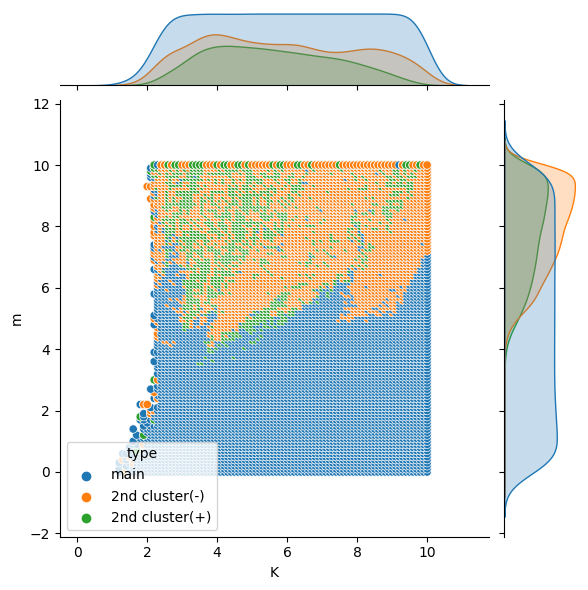

In [ ]:
g = sns.jointplot(df_data, x="K", y="m",hue='type',sizes='cluster size')


In [ ]:
df_data.query('type == \'2nd cluster(-)\'')

K     m  cluster mean phase velocity  cluster size            type  \
2       1.4   0.0                    -0.144122          27.0  2nd cluster(-)   
91      1.4   0.1                    -0.199332          27.0  2nd cluster(-)   
267     1.6   0.3                    -0.164172          26.0  2nd cluster(-)   
353     1.3   0.4                    -0.255571          19.0  2nd cluster(-)   
356     1.6   0.4                    -0.208454          33.0  2nd cluster(-)   
...     ...   ...                          ...           ...             ...   
15079   9.6  10.0                    -1.553522          18.0  2nd cluster(-)   
15081   9.7  10.0                    -1.472186          26.0  2nd cluster(-)   
15083   9.8  10.0                    -1.472945          25.0  2nd cluster(-)   
15086   9.9  10.0                    -1.465150          25.0  2nd cluster(-)   
15088  10.0  10.0                    -1.526074          19.0  2nd cluster(-)   

       $r$\'s temporal std  
2                 0.062979  
91                0.054063  
267               0.050194  
353               0.038704  
356               0.044418  
...                    ...  
15079             0.039489  
15081             0.044789  
15083             0.042636  
15086             0.042307  
15088             0.029398  

[4273 rows x 6 columns]